# A Novel CNN Architecture for Music Genre Classification from Audio Features
By

FNU ANDRIA GRACE

PRAVEEN KUMAR GOVIND REDDY

---



> The Convolutional Neural Network (CNN) model for music genre classification demonstrates promising performance in automatically categorizing music into different genres based on audio features. Trained on a dataset of 1000 audio samples across 10 genres, the model achieved a test accuracy of 77%, showcasing its ability to distinguish between various musical styles.
The CNN architecture consists of two 1D convolutional layers with max pooling, followed by dense layers and dropout for regularization. This structure allows the network to learn hierarchical representations of the audio features, capturing both local and global patterns in the music. The model was trained on a comprehensive set of audio features, including spectral and temporal characteristics, extracted from each music sample.
After 200 epochs of training, the model showed significant improvement, progressing from an initial training accuracy of 11.11% to a final training accuracy of 98.92%. The high performance on the test set indicates the model's ability to generalize well to unseen data. However, the gap between training and test accuracy suggests some overfitting, highlighting potential areas for further optimization and refinement in future iterations of the model.c genres based on audio characteristics.


# 1. Importing Required Libraries
This section includes all the necessary library imports for data processing, visualization, machine learning, and working with audio files. Libraries like TensorFlow, librosa, and sklearn are used.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import librosa
import librosa.display
import os
import random

# Spectogram

# 2. Downloading and Loading the Dataset
This section demonstrates how the dataset is downloaded using Kaggle API and verifies the contents of the downloaded archive. It includes:

Downloading the dataset.

Checking the structure of the files.

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("andradaolteanu/gtzan-dataset-music-genre-classification")

print("Path to dataset files:", path)

100%|██████████| 1.21G/1.21G [00:16<00:00, 78.7MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/versions/1


# 3. Inspecting File Contents:

In [ ]:
# Check the file's contents (raw data)
with open('archive.zip', 'rb') as file:
    print(file.read(100))  # Prints the first 100 bytes of the file


b'PK\x03\x04-\x00\x00\x00\x08\x00\xe1pxPd0\x1b\x1d\xff\xff\xff\xff\xff\xff\xff\xff\x18\x00\x14\x00Data/features_30_sec.csv\x01\x00\x10\x00/\xe9\x10\x00\x00\x00\x00\x00c}\x07\x00\x00\x00\x00\x00|\xbd\xeb\xae$Ir\xa4\xf9\x7f\x81}\x93\xc8\x80\xdb\xdd\xeci\x1a\xc5f\xf5\x90@_'


# 4. Extract Genre Directories from ZIP File:

In [ ]:
import zipfile


base_path = "/content/archive.zip"

# Open the zip file
with zipfile.ZipFile(base_path, 'r') as zip_ref:
    # Get a list of all members in the archive
    all_files = zip_ref.namelist()
    # Filter for directories (folders)
    genres = [f for f in all_files if f.endswith('/')]

    # You can further process the 'genres' list
    # to remove trailing slashes and get the folder names
    genres = [f[:-1].split('/')[-1] for f in genres] #this will remove trailing '/' from file names and extract only the last folder name
    #genres will now contain list of folder names

# 5. Display Extracted Genre Names:

In [ ]:
import zipfile
import os

base_path = "/content/genres_original.zip"

# Open the zip file
with zipfile.ZipFile(base_path, 'r') as zip_ref:
    # Get a list of all members in the archive
    all_files = zip_ref.namelist()
    # Filter for directories (folders)
    genres = [f for f in all_files if f.endswith('/')]

    # You can further process the 'genres' list
    # to remove trailing slashes and get the folder names
    genres = [f[:-1].split('/')[-1] for f in genres] #this will remove trailing '/' from file names and extract only the last folder name
    #genres will now contain list of folder names

# Now 'genres' should contain a list of the folder names within the zip file.
print(genres)

['genres_original', 'blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


#6.Spectrogram and Frequency Spectrum
Selects a random audio file from each genre, computes its spectrogram, and visualizes it alongside its frequency spectrum. This provides insights into the audio's frequency and time characteristics.

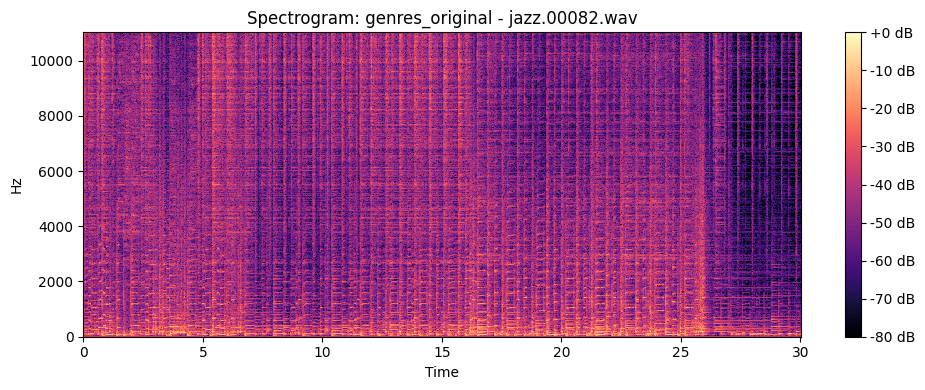

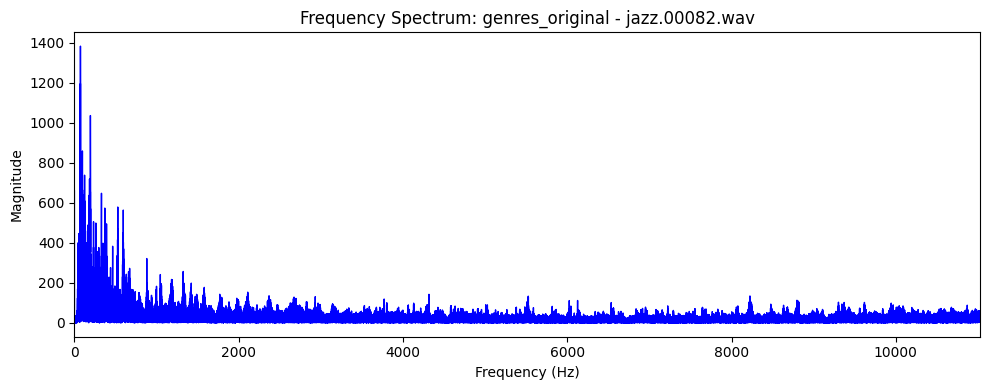

In [ ]:
import zipfile
import os
import random
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

base_path = "/content/genres_original.zip"

# Open the zip file
with zipfile.ZipFile(base_path, 'r') as zip_ref:
    # Get a list of all members in the archive
    all_files = zip_ref.namelist()
    # Filter for directories (folders)
    genres = [f for f in all_files if f.endswith('/')]

    # You can further process the 'genres' list
    # to remove trailing slashes and get the folder names
    genres = [f[:-1].split('/')[-1] for f in genres] #this will remove trailing '/' from file names and extract only the last folder name
    #genres will now contain list of folder names

    for genre in genres:
        # Get a list of wav files for the current genre within the zip file
        wav_files = [f for f in all_files if f.startswith(genre + "/") and f.endswith(".wav")]

        if not wav_files:
            continue

        # Randomly pick a file
        file = random.choice(wav_files)

        # Extract the audio file to a temporary location
        with zip_ref.open(file) as myfile:
            y, sr = librosa.load(myfile, sr=None)

        # Compute spectrogram
        D = librosa.stft(y, n_fft=2048, hop_length=512)
        S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

        # Plot the spectrogram
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz', cmap='magma')
        plt.colorbar(format='%+2.0f dB')
        plt.title(f"Spectrogram: {genre} - {file.split('/')[-1]}")  # Use the filename from the zip
        plt.tight_layout()
        plt.show()

        # Plot the frequency spectrum
        # Compute FFT for entire signal
        fft = np.fft.fft(y)
        magnitude = np.abs(fft)
        freqs = np.linspace(0, sr, len(magnitude))

        # Only plot the first half of the spectrum
        half_len = len(magnitude) // 2
        left_magnitude = magnitude[:half_len]
        left_freqs = freqs[:half_len]

        plt.figure(figsize=(10, 4))
        plt.plot(freqs, magnitude, color='blue', linewidth=1)
        plt.title(f"Frequency Spectrum: {genre} - {file.split('/')[-1]}")  # Use the filename from the zip
        plt.xlabel("Frequency (Hz)")
        plt.ylabel("Magnitude")
        plt.xlim(0, sr/2)
        plt.tight_layout()
        plt.show()

#7.Metadata Preprocessing Function
Description: Defines a function to clean and preprocess metadata from a CSV file. Specifically, it trims file extensions from the filenames.

In [ ]:
def preprocess_csv(filename):

    df = pd.read_csv(filename)
    df['filename'] = df['filename'].str.split('.').str[0]

    return df

#8.Loading and Inspecting Metadata
Preprocesses the metadata CSV file using the earlier defined function and displays the first few rows.

In [ ]:
df = preprocess_csv('features_30_sec.csv')
df.head()

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0    blues  661794          0.350088         0.088757  0.130228  0.002827   
1    blues  661794          0.340914         0.094980  0.095948  0.002373   
2    blues  661794          0.363637         0.085275  0.175570  0.002746   
3    blues  661794          0.404785         0.093999  0.141093  0.006346   
4    blues  661794          0.308526         0.087841  0.091529  0.002303   

   spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0             1784.165850          129774.064525              2002.449060   
1             1530.176679          375850.073649              2039.036516   
2             1552.811865          156467.643368              1747.702312   
3             1070.106615          184355.942417              1596.412872   
4             1835.004266          343399.939274              1748.172116   

   spectral_bandwidth_var  ...  mfcc16_var  mfcc17_mean  mfcc17_var  \
0            85882.761315  ...   52.420910    -1.690215   36.524071   
1           213843.755497  ...   55.356403    -0.731125   60.314529   
2            76254.192257  ...   40.598766    -7.729093   47.639427   
3           166441.494769  ...   44.427753    -3.319597   50.206673   
4            88445.209036  ...   86.099236    -5.454034   75.269707   

   mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  mfcc20_mean  mfcc20_var  \
0    -0.408979   41.597103    -2.303523   55.062923     1.221291   46.936035   
1     0.295073   48.120598    -0.283518   51.106190     0.531217   45.786282   
2    -1.816407   52.382141    -3.439720   46.639660    -2.231258   30.573025   
3     0.636965   37.319130    -0.619121   37.259739    -3.407448   31.949339   
4    -0.916874   53.613918    -4.404827   62.910812   -11.703234   55.195160   

   label  
0  blues  
1  blues  
2  blues  
3  blues  
4  blues  

[5 rows x 60 columns]

#9.Checking for Missing Values
Drops unnecessary columns and checks for any missing values in the dataset.

In [ ]:
df = df.drop(columns=['filename'])
df.isnull().sum()

length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_mean                 0
mfcc8_var                  0
mfcc9_mean                 0
mfcc9_var                  0
mfcc10_mean                0
mfcc10_var                 0
mfcc11_mean                0
mfcc11_var                 0
mfcc12_mean                0
mfcc12_var                 0
mfcc13_mean                0
mfcc13_var                 0
mfcc14_mean                0
mfcc14_var                 0
mfcc15_mean                0
mfcc15_var                 0
mfcc16_mean                0
mfcc16_var                 0
mfcc17_mean                0
mfcc17_var                 0
mfcc18_mean                0
mfcc18_var                 0
mfcc19_mean                0
mfcc19_var                 0
mfcc20_mean                0
mfcc20_var                 0
label                      0
dtype: int64

#10.Encoding Labels
Converts the categorical genre labels into numerical format using LabelEncoder.

In [ ]:
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])
df.head()


length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0  661794          0.350088         0.088757  0.130228  0.002827   
1  661794          0.340914         0.094980  0.095948  0.002373   
2  661794          0.363637         0.085275  0.175570  0.002746   
3  661794          0.404785         0.093999  0.141093  0.006346   
4  661794          0.308526         0.087841  0.091529  0.002303   

   spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0             1784.165850          129774.064525              2002.449060   
1             1530.176679          375850.073649              2039.036516   
2             1552.811865          156467.643368              1747.702312   
3             1070.106615          184355.942417              1596.412872   
4             1835.004266          343399.939274              1748.172116   

   spectral_bandwidth_var  rolloff_mean  ...  mfcc16_var  mfcc17_mean  \
0            85882.761315   3805.839606  ...   52.420910    -1.690215   
1           213843.755497   3550.522098  ...   55.356403    -0.731125   
2            76254.192257   3042.260232  ...   40.598766    -7.729093   
3           166441.494769   2184.745799  ...   44.427753    -3.319597   
4            88445.209036   3579.757627  ...   86.099236    -5.454034   

   mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  mfcc20_mean  \
0   36.524071    -0.408979   41.597103    -2.303523   55.062923     1.221291   
1   60.314529     0.295073   48.120598    -0.283518   51.106190     0.531217   
2   47.639427    -1.816407   52.382141    -3.439720   46.639660    -2.231258   
3   50.206673     0.636965   37.319130    -0.619121   37.259739    -3.407448   
4   75.269707    -0.916874   53.613918    -4.404827   62.910812   -11.703234   

   mfcc20_var  label  
0   46.936035      0  
1   45.786282      0  
2   30.573025      0  
3   31.949339      0  
4   55.195160      0  

[5 rows x 59 columns]

#11.Label Mapping
Displays the mapping between genre names (labels) and their corresponding encoded values.

In [ ]:
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("\nLabel Encoding Mapping:")
for label, encoded_value in label_mapping.items():
    print(f"Class '{label}' -> {encoded_value}")


Label Encoding Mapping:
Class 'blues' -> 0
Class 'classical' -> 1
Class 'country' -> 2
Class 'disco' -> 3
Class 'hiphop' -> 4
Class 'jazz' -> 5
Class 'metal' -> 6
Class 'pop' -> 7
Class 'reggae' -> 8
Class 'rock' -> 9


#12.Shuffling the Dataset
Randomly shuffles the dataset to ensure a uniform distribution of data during training and testing.


In [ ]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df.head()

length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0  661794          0.432707         0.087017  0.047977  0.000411   
1  661504          0.451825         0.085256  0.240985  0.008035   
2  661504          0.292264         0.085571  0.199328  0.005632   
3  661794          0.540349         0.059563  0.125761  0.000635   
4  661794          0.444012         0.085203  0.203773  0.006599   

   spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0             2915.017702          465988.571671              2420.421212   
1             3238.215472          635263.200965              2954.126414   
2             1962.036801          261307.494531              2325.013206   
3             2315.317248          115250.776839              2066.651952   
4             2095.420824          430313.487168              2241.060906   

   spectral_bandwidth_var  rolloff_mean  ...  mfcc16_var  mfcc17_mean  \
0            55397.978934   5864.933419  ...   52.428093    -6.002379   
1           167148.237400   6701.364299  ...   47.259617    -2.177770   
2           179382.875864   3820.419899  ...   72.924728    -0.548955   
3            37095.019096   4615.982658  ...   21.919737    -6.810860   
4           110796.012282   4581.850948  ...   76.894180    -2.812528   

   mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  mfcc20_mean  \
0   44.046604     2.347543   57.231190    -3.352306   68.406425     2.508936   
1   38.882034    -1.600560   51.832035    -0.616253   57.315872    -4.048588   
2   78.905830    -0.568484   87.446632     0.643941   66.528664    -1.999727   
3   24.919960     4.214549   15.420555    -3.401198   20.339085     1.762156   
4  101.614967     6.798242  107.964317    -5.803802  103.876694    -3.767237   

   mfcc20_var  label  
0   58.562813      5  
1   53.083454      7  
2  107.257652      7  
3   17.411707      6  
4   92.247749      4  

[5 rows x 59 columns]

#13.Class Balance
Counts the number of samples per class to check for class balance in the dataset.

In [ ]:
df['label'].value_counts()

label
5    100
7    100
6    100
4    100
8    100
1    100
0    100
9    100
2    100
3    100
Name: count, dtype: int64

Dataset is completely balanced as each of the class has same number of rows

#14. Splitting into training and testing sets
Splits the dataset into training, validation, and testing sets while maintaining stratified sampling to preserve class distribution.

In [ ]:
X = df.drop(columns=['label'])
y = df['label']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


#15.Standardizing the Features
Standardizes the feature values using StandardScaler, which helps in improving the performance of the machine learning models by ensuring all features have a mean of 0 and a standard deviation of 1.


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

#16.Reshaping Data for CNN Input
Reshapes the datasets to match the input format expected by the 1D Convolutional Neural Network (CNN). This ensures that each feature has a shape compatible with the convolution layers.

In [ ]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


#17.Defining the 1D CNN Model
Defines the architecture for a 1D Convolutional Neural Network (CNN) for music genre classification. The model consists of convolution layers, max-pooling layers, and dense layers, including a dropout layer to prevent overfitting.

In [ ]:
model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(58, 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#18.Compiling the Model
Compiles the model using the Adam optimizer and sparse categorical cross-entropy loss function. It also includes the accuracy metric for model evaluation.

In [ ]:
from tensorflow.keras.optimizers import Adam
learning_rate = 0.5
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 56, 32)              │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 28, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 26, 64)              │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 13, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 832)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         106,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 114,250 (446.29 KB)

 Trainable params: 114,250 (446.29 KB)

 Non-trainable params: 0 (0.00 B)

#19.Training the Model
Trains the model using the training and validation datasets. The model is trained for 200 epochs with a batch size of 32, while early stopping is applied to prevent overfitting.

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=200,
    batch_size=32,
    verbose=1
)

Epoch 1/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.1111 - loss: 2.2830 - val_accuracy: 0.4000 - val_loss: 1.8658
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3362 - loss: 1.8457 - val_accuracy: 0.5500 - val_loss: 1.4977
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3908 - loss: 1.6243 - val_accuracy: 0.5600 - val_loss: 1.3847
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4798 - loss: 1.4687 - val_accuracy: 0.5600 - val_loss: 1.3092
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5404 - loss: 1.3320 - val_accuracy: 0.5900 - val_loss: 1.2149
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5830 - loss: 1.2301 - val_accuracy: 0.6000 - val_loss: 1.1615
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5963 - loss: 1.1327 - val_accuracy: 0.6600 - val_loss: 1.0989
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6518 - loss: 1.0012 - val_accuracy: 0.6600 -

#20.Evaluating the Model
Evaluates the model's performance on the test dataset and prints the test accuracy.

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

Test Accuracy: 0.7700


#21.Plotting Model Accuracy
Plots the training and validation accuracy over the epochs to visualize the model's learning process.

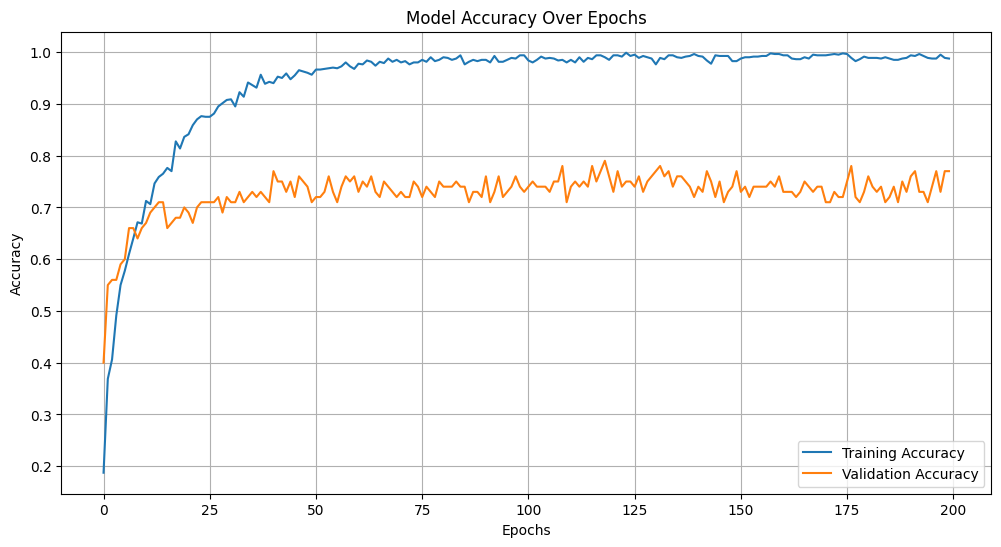

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

#22. Plotting Model Loss
Plots the training and validation loss over the epochs to track the model's loss during training.

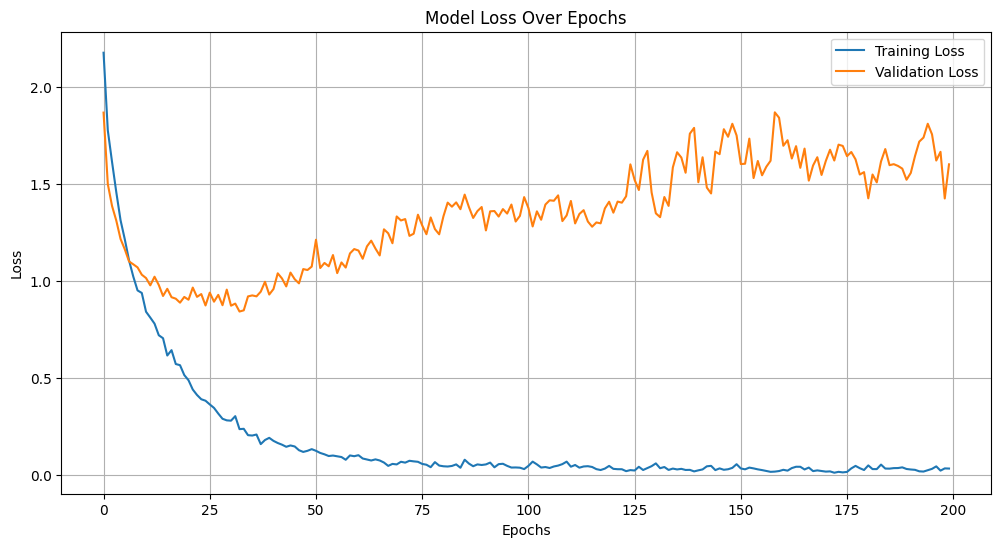

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

#23. Generating Classification Report
Predicts the labels for the test set, compares them with the true labels, and generates a classification report, which includes precision, recall, and F1-score metrics.

In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_classes))


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       0.82      0.90      0.86        10
           2       1.00      0.60      0.75        10
           3       0.80      0.40      0.53        10
           4       0.80      0.80      0.80        10
           5       0.69      0.90      0.78        10
           6       0.77      1.00      0.87        10
           7       0.82      0.90      0.86        10
           8       0.88      0.70      0.78        10
           9       0.54      0.70      0.61        10

    accuracy                           0.77       100
   macro avg       0.79      0.77      0.76       100
weighted avg       0.79      0.77      0.76       100



#24. Plotting Confusion Matrix
Generates and displays the confusion matrix for the test set predictions, helping to visualize the performance of the classification model for each genre.

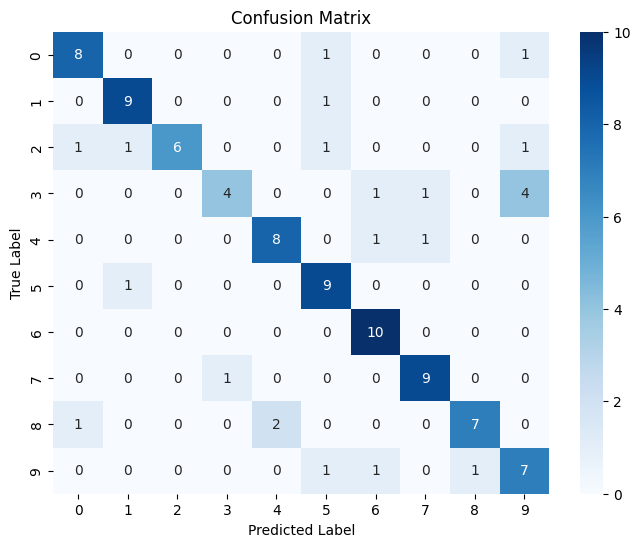

In [ ]:
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#25. Evaluating the Model Accuracy
Re-evaluates the model accuracy on the test set and prints the results. This provides a final metric of how well the model performs on unseen data.

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Test Accuracy: 77.00%


#26. Predicting on a Random Test Sample
Makes a random prediction on a test sample and compares the predicted genre with the true genre.

In [ ]:
import random

# Pick a random sample from the test set
random_idx = random.randint(0, len(X_test) - 1)
sample_input = X_test[random_idx:random_idx + 1]  # Extract a single test sample
true_label = y_test.iloc[random_idx]  # Get the true label for the sample

# Predict the genre
predicted_label = np.argmax(model.predict(sample_input))

# Decode labels to genre names
true_genre = label_encoder.inverse_transform([true_label])[0]
predicted_genre = label_encoder.inverse_transform([predicted_label])[0]

# Display the prediction example
print(f"Input: Test sample index {random_idx}")
print(f"Predicted Genre: {predicted_genre}")
print(f"Actual Genre: {true_genre}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Input: Test sample index 37
Predicted Genre: hiphop
Actual Genre: hiphop


#27. Random Predictions for 10 Samples
Description: Makes random predictions for 10 samples from the test set and prints the predicted and actual genres for each.



In [ ]:
import random

# Pick a random sample from the test set
random_idx = random.randint(0, len(X_test) - 1)
sample_input = X_test[random_idx:random_idx + 1]  # Extract a single test sample
true_label = y_test.iloc[random_idx]  # Get the true label for the sample

# Predict the genre
predicted_label = np.argmax(model.predict(sample_input))

# Decode labels to genre names
true_genre = label_encoder.inverse_transform([true_label])[0]
predicted_genre = label_encoder.inverse_transform([predicted_label])[0]

# Display the prediction example
print(f"Input: Test sample index {random_idx}")
print(f"Predicted Genre: {predicted_genre}")
print(f"Actual Genre: {true_genre}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Input: Test sample index 16
Predicted Genre: metal
Actual Genre: metal


#28. Exploring Audio Predictions
Generates predictions for specific test samples, visualizes their audio properties, and compares predictions with actual genres. This snippet demonstrates additional exploration of predictions and error analysis.

In [ ]:
import random
import numpy as np

# Generate 10 random predictions
print("10 Example Predictions:\n")
for i in range(10):
    # Pick a random index from the test set
    random_idx = random.randint(0, len(X_test) - 1)
    sample_input = X_test[random_idx:random_idx + 1]  # Extract a single test sample
    true_label = y_test.iloc[random_idx]  # Get the true label for the sample

    # Predict the genre
    predicted_label = np.argmax(model.predict(sample_input))

    # Decode labels to genre names
    true_genre = label_encoder.inverse_transform([true_label])[0]
    predicted_genre = label_encoder.inverse_transform([predicted_label])[0]

    # Display the prediction example
    print(f"Example {i + 1}:")
    print(f"  Input Index: {random_idx}")
    print(f"  Predicted Genre: {predicted_genre}")
    print(f"  Actual Genre: {true_genre}")
    print("-" * 40)


10 Example Predictions:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Example 1:
  Input Index: 95
  Predicted Genre: jazz
  Actual Genre: country
----------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Example 2:
  Input Index: 59
  Predicted Genre: country
  Actual Genre: country
----------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Example 3:
  Input Index: 26
  Predicted Genre: pop
  Actual Genre: pop
----------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
Example 4:
  Input Index: 0
  Predicted Genre: metal
  Actual Genre: metal
----------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
Example 5:
  Input Index: 9
  Predicted Genre: jazz
  Actual Genre: jazz
----------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Example 6:
  Input Index: 76
  Predicted Genre: metal
  Actual Genre: metal
----------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Example 

#28. Visualizing Spectrograms for Specific Genres
Extracts and visualizes spectrograms and frequency spectrums for specific genres (e.g., blues, hip-hop, classical, etc.). It selects the first audio file of each target genre from the dataset archive for analysis.

Enter the full path to the 'genres_original.zip' file: /content/genres_original.zip
Processing one file from genre: blues


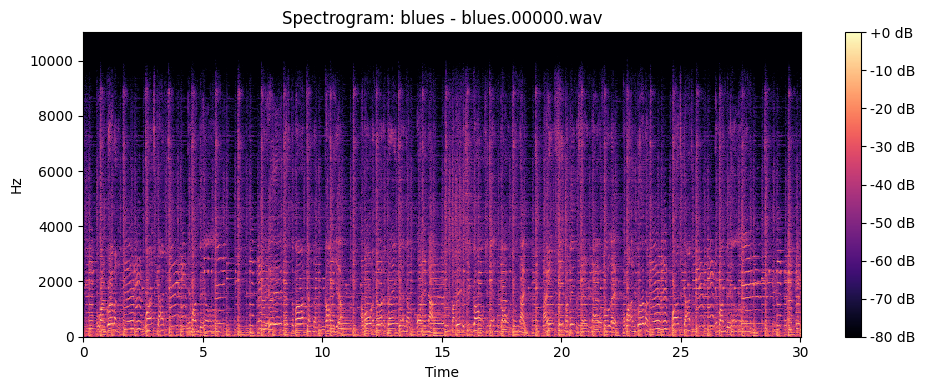

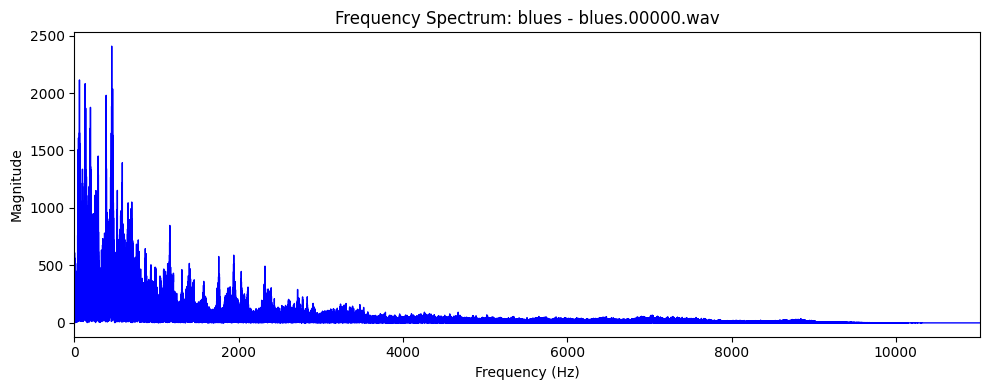

Processing one file from genre: hiphop


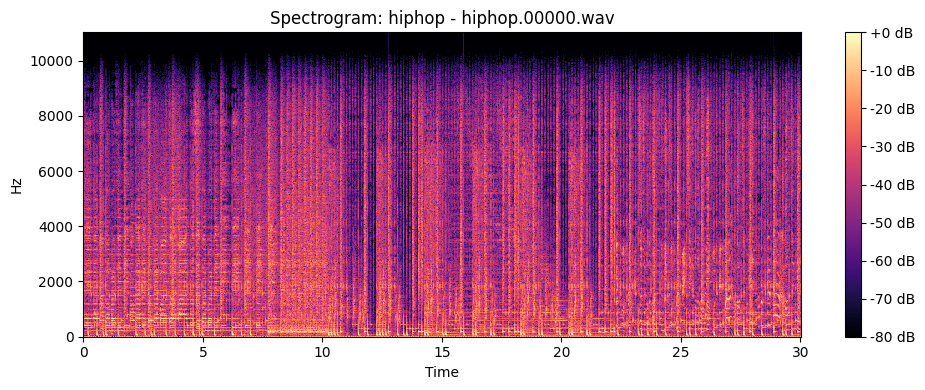

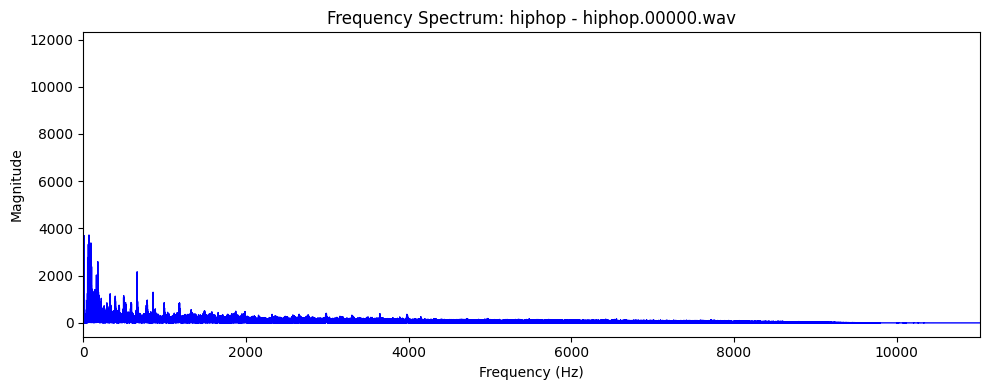

Processing one file from genre: classical


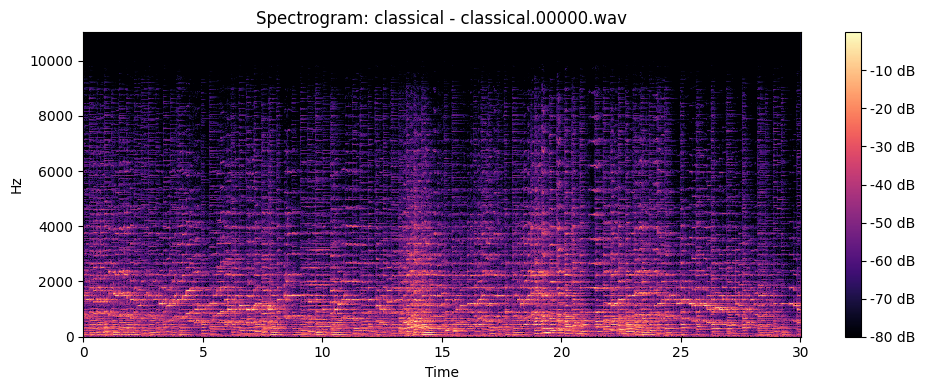

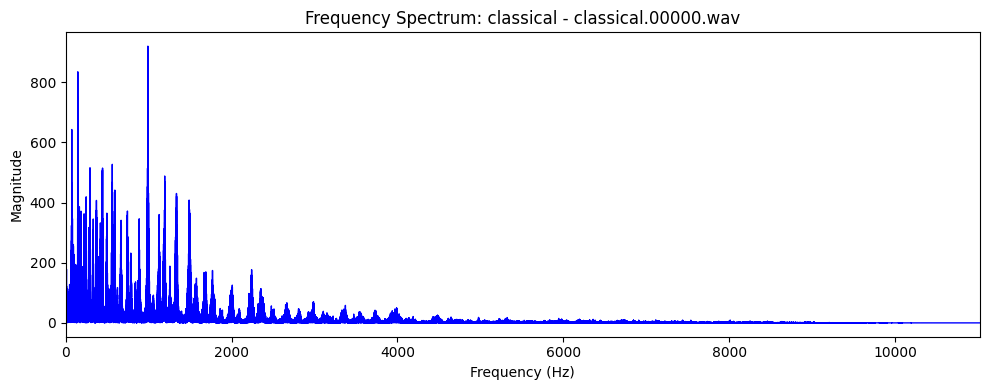

Processing one file from genre: jazz


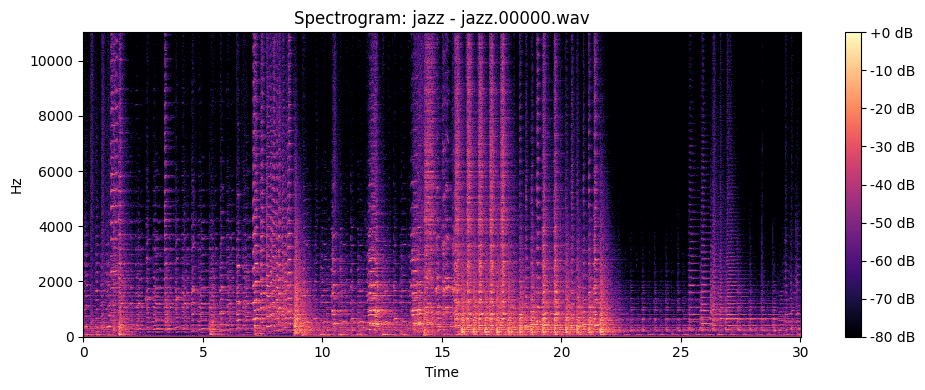

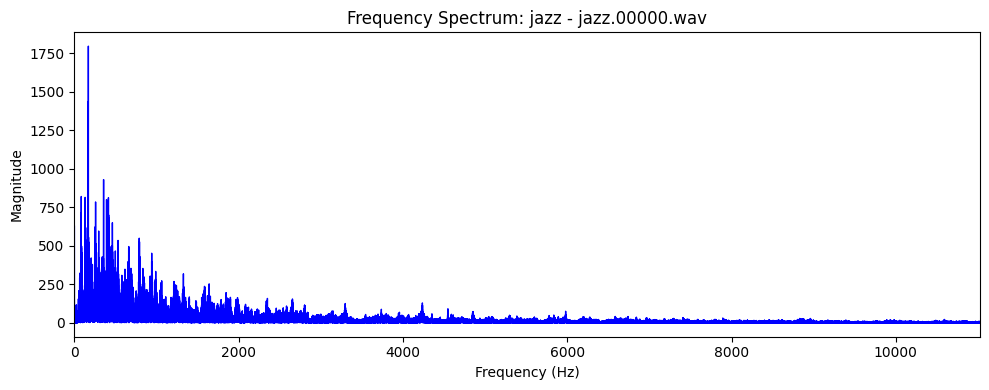

Processing one file from genre: pop


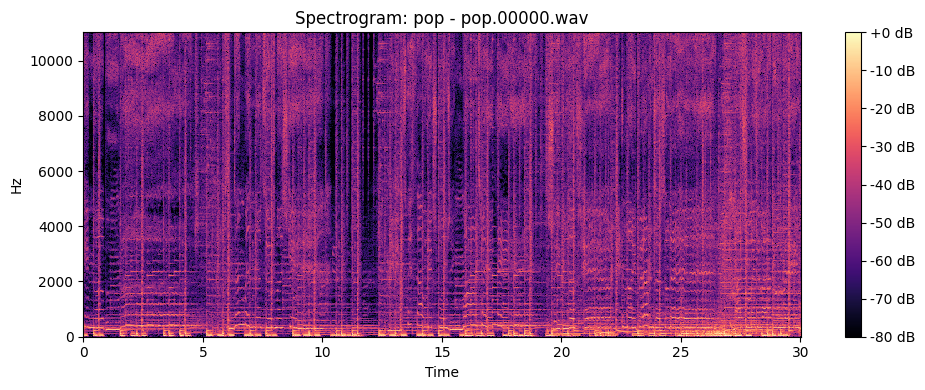

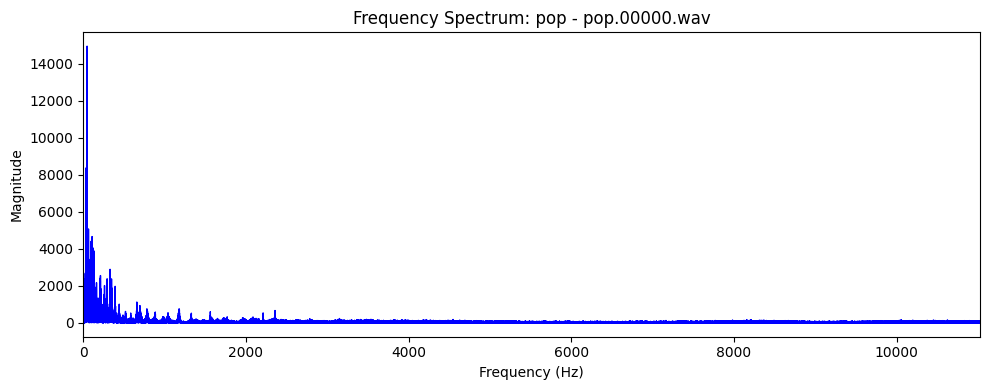

Processing one file from genre: rock


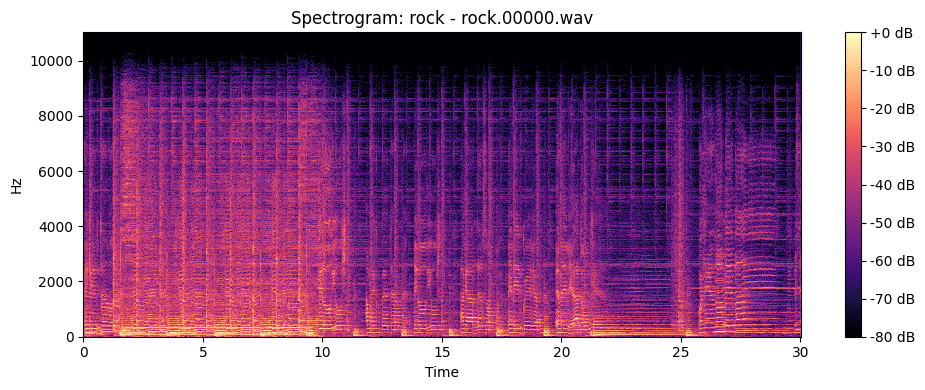

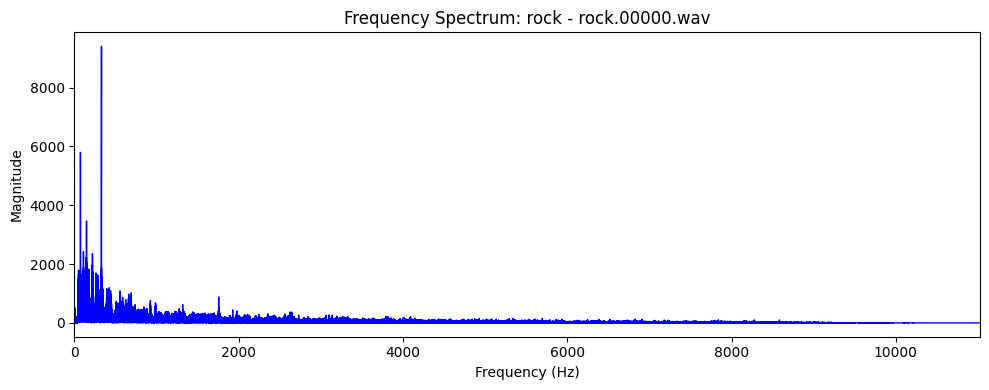

Processing one file from genre: metal


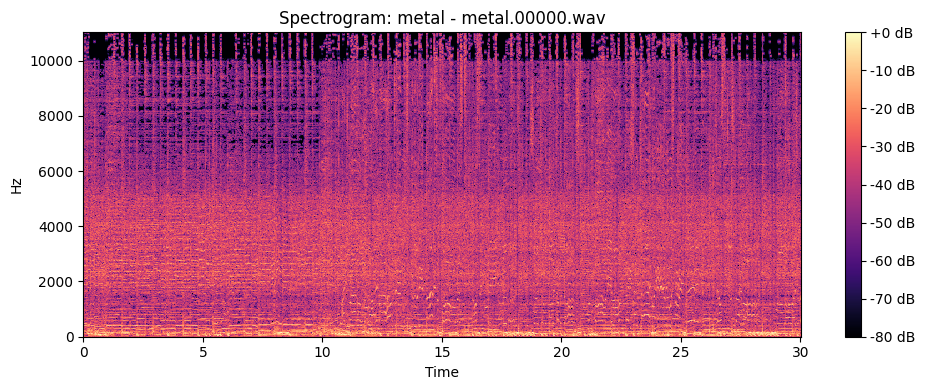

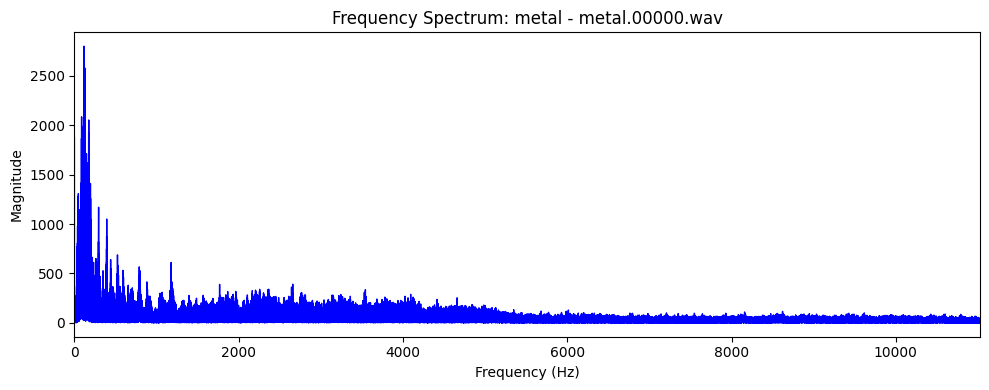

Processing one file from genre: reggae


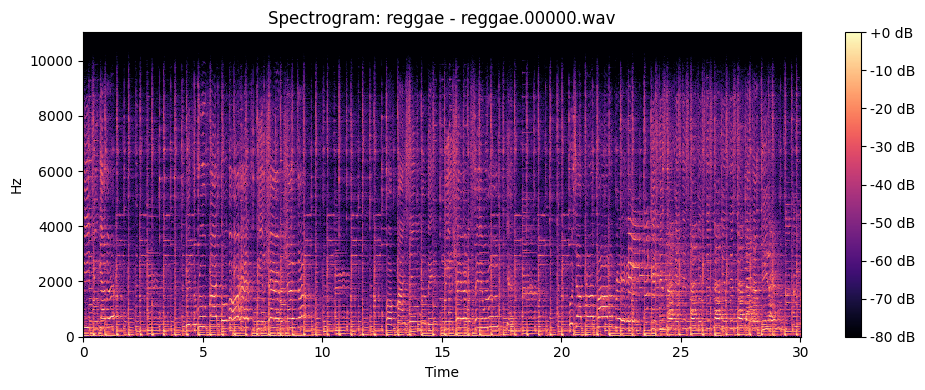

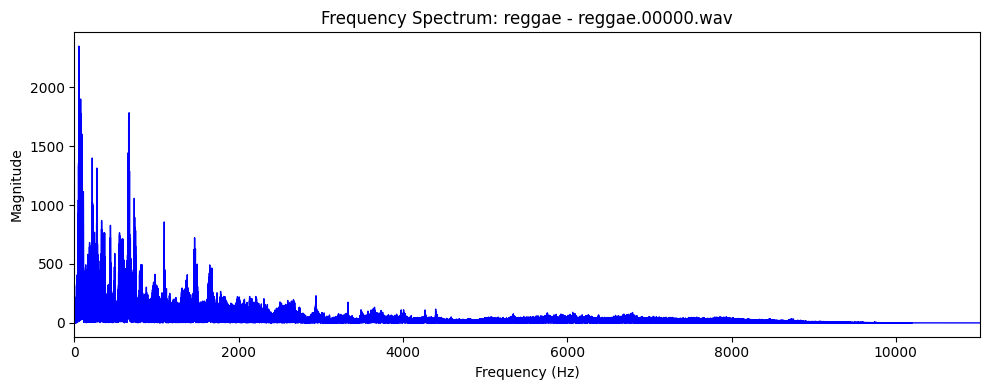

Processing one file from genre: country


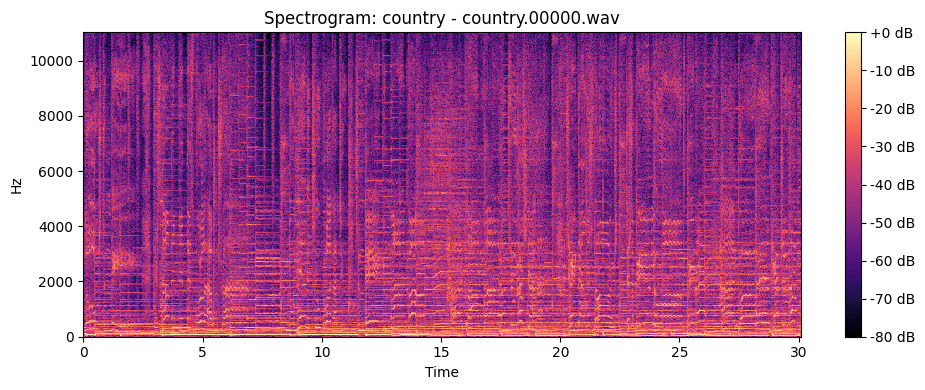

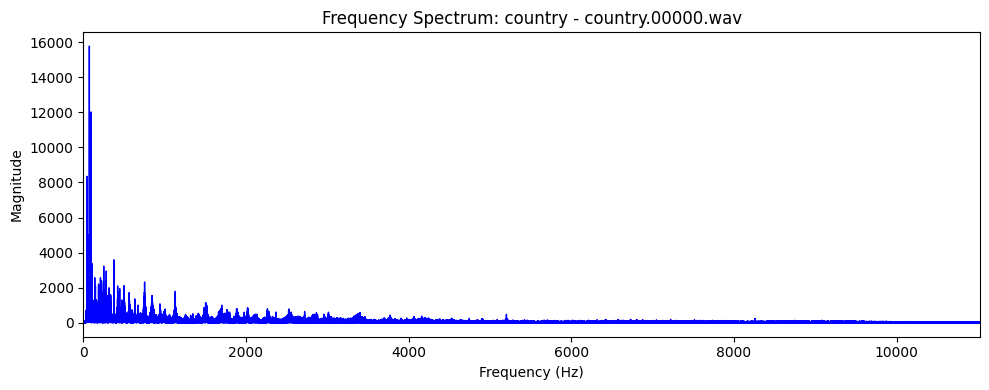

Processing one file from genre: disco


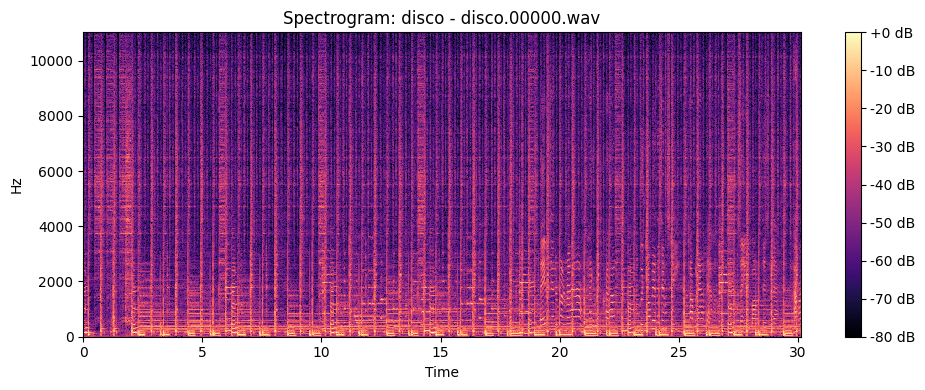

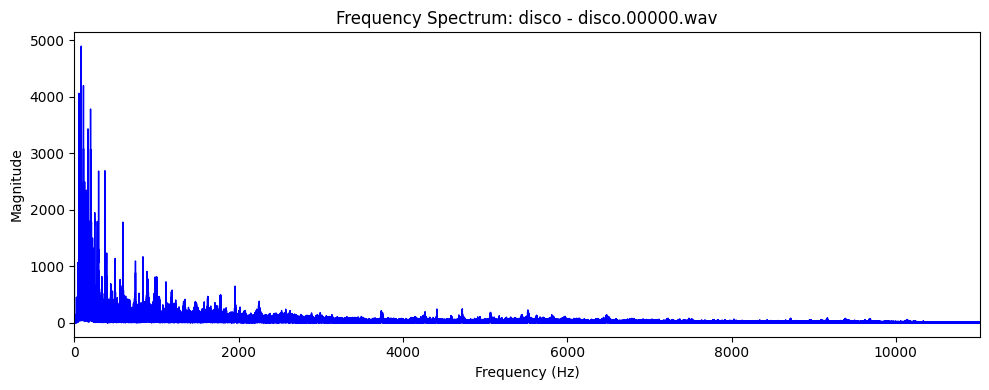

In [ ]:
import zipfile
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os

# Path to the ZIP file
zip_path = input("Enter the full path to the 'genres_original.zip' file: ")

# List of specific genres to process
target_genres = ["blues", "hiphop", "classical", "jazz", "pop", "rock", "metal", "reggae", "country", "disco"]

# Open the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # Get a list of all files in the archive
    all_files = zip_ref.namelist()

    for genre in target_genres:
        print(f"Processing one file from genre: {genre}")

        # Find all files belonging to the current genre
        wav_files = [f for f in all_files if f"{genre}/" in f and f.endswith(".wav")]
        if not wav_files:
            print(f"No audio files found for genre: {genre}")
            continue

        # Select the first file from the genre
        file = wav_files[0]

        try:
            # Load the audio file directly from the ZIP
            with zip_ref.open(file) as audio_file:
                y, sr = librosa.load(audio_file, sr=None)

            # Compute spectrogram
            D = librosa.stft(y, n_fft=2048, hop_length=512)
            S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

            # Plot the spectrogram
            plt.figure(figsize=(10, 4))
            librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz', cmap='magma')
            plt.colorbar(format='%+2.0f dB')
            plt.title(f"Spectrogram: {genre} - {os.path.basename(file)}")
            plt.tight_layout()
            plt.show()

            # Compute and plot the frequency spectrum
            fft = np.fft.fft(y)
            magnitude = np.abs(fft)
            freqs = np.linspace(0, sr, len(magnitude))

            # Only plot the first half of the spectrum
            half_len = len(magnitude) // 2
            left_magnitude = magnitude[:half_len]
            left_freqs = freqs[:half_len]

            plt.figure(figsize=(10, 4))
            plt.plot(left_freqs, left_magnitude, color='blue', linewidth=1)
            plt.title(f"Frequency Spectrum: {genre} - {os.path.basename(file)}")
            plt.xlabel("Frequency (Hz)")
            plt.ylabel("Magnitude")
            plt.xlim(0, sr / 2)
            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(f"Error processing file {file}: {e}")


**RESEARCH PAPER**

https://www.researchgate.net/publication/387290921_A_Novel_CNN_Architecture_for_Music_Genre_Classification_from_Audio_Features

**CONCLUSION**

 This study presents a Convolutional Neural Network (CNN)-based
 approach for music genre classification, achieving a test accuracy of
 77%. By leveraging features such as spectral, temporal, and tonal
 characteristics, the model demonstrates its ability to automatically
 learn and classify music genres effectively. However, the observed
 overfitting highlights the need for further optimization through tech
niques such as data augmentation, increased dropout rates, or hybrid
 models combining CNNs with RNNs. The results provide a founda
tion for advancing automated music classification systems, with po
tential applications in music recommendation engines, playlist gen
eration, and other music information retrieval tasks. Future work
 could focus on incorporating larger datasets and transfer learning to
 improve generalization and performance